# Make the fits file for the Ronchi Grating
============================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/CNRS
- date March 19th 2017

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
from astropy.io import fits

In [2]:
from datetime import datetime, timedelta

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [4]:
import poppy
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'large'
poppy.__version__

Populating the interactive namespace from numpy and matplotlib


u'0.5.1'

In [5]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2017-03-19 19:33:09.241134
fits date format for the analysis :  2017-03-19T19:33:09


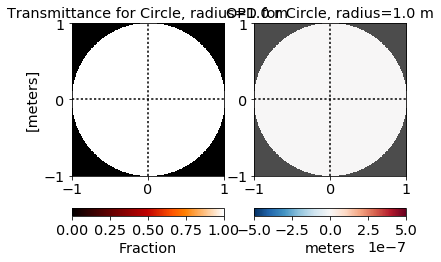

In [6]:
ap = poppy.CircularAperture(radius=1)      # create a simple circular aperture
ap.display(what='both')                    # display both intensity and phase components

values = ap.sample(npix=512)               # evaluate on 512 x 512 grid
ap.to_fits('test_circle.fits', npix=1024)  # write to disk as a FITS file with higher sampling

In [7]:
hdulist = fits.open('test_circle.fits')

In [8]:
hdulist[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
EXTEND  =                    T                                                  
OPTIC   = 'Circle, radius=1.0 m' / Descriptive name of this optic               
NAME    = 'Circle, radius=1.0 m'                                                
SOURCE  = 'Computed with POPPY'                                                 
VERSION = '0.5.1   '           / software version of POPPY                      
CONTENTS= 'amplitude'                                                           
PLANETYP=                    0 / 0=unspecified, 1=pupil, 2=image, 3=detector, 4=
PUPLSCAL=          0.0019531

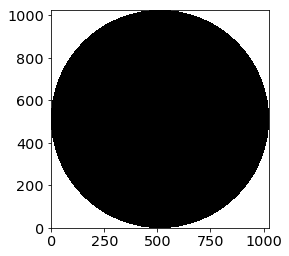

In [9]:
plt.imshow(hdulist[0].data,cmap="Greys")

# Constants

In [10]:
mm_to_m=1e-3
inch_to_mm=25.4

In [11]:
R200=200. # 200 lines per mm

In [12]:
grating_size=5 # mm
#grating_size=2*inch_to_mm # mm Kernel dead

In [13]:
a=1./R200  # in mm : pad line-to line distance 5 microns

In [14]:
b=a/2  # width of grooves : 2.5 microns

In [15]:
Nlines=R200*grating_size  # 800 lines in beam

# Generate a small transmission and opd

In [16]:
ARRAY_SIZE=int(Nlines*2)

In [17]:
transmission=np.zeros([ARRAY_SIZE,ARRAY_SIZE])
opd=np.zeros([ARRAY_SIZE,ARRAY_SIZE])

In [18]:
even_indexes=all_indexes=np.arange(ARRAY_SIZE)

In [19]:
even_indexes=np.where(all_indexes%2==0)

In [20]:
odd_indexes=np.where(all_indexes%2==1)

In [21]:
transmission[:,even_indexes]=1
transmission[:,odd_indexes]=0

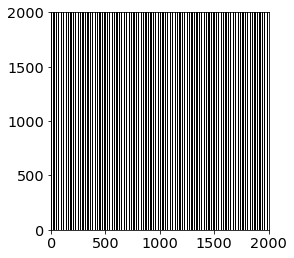

In [22]:
plt.imshow(transmission,cmap="Greys")

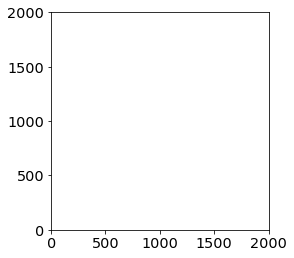

In [23]:
plt.imshow(opd,cmap="Greys")

In [24]:
hdu_transmission = fits.PrimaryHDU(transmission)

In [25]:
hdu_transmission.header["OPTIC"]="transmission Ronchi 200"
hdu_transmission.header["NAME"]= "TransRonchi200"
hdu_transmission.header["SOURCE"]= "Sylvie Dagoret-Campagne"
hdu_transmission.header["DATE"]= "March 2017"
hdu_transmission.header["VERSION"]=poppy.__version__
hdu_transmission.header["CONTENTS"]= 'transmission'                                                           
hdu_transmission.header["PLANETYP"]=1 #  1=pupil, 2=image, 3=detector, 4=
hdu_transmission.header["PUPLSCAL"]=b*mm_to_m

In [26]:
hdu_transmission.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2000                                                  
NAXIS2  =                 2000                                                  
EXTEND  =                    T                                                  
OPTIC   = 'transmission Ronchi 200'                                             
NAME    = 'TransRonchi200'                                                      
SOURCE  = 'Sylvie Dagoret-Campagne'                                             
DATE    = 'March 2017'                                                          
VERSION = '0.5.1   '                                                            
CONTENTS= 'transmission'                                                        
PLANETYP=                   

In [27]:
hdu_opd=fits.PrimaryHDU(opd)

In [28]:
hdu_opd.header["OPTIC"]="OPD Ronchi 200"
hdu_opd.header["NAME"]= "OPDRonchi200"
hdu_opd.header["SOURCE"]= "Sylvie Dagoret-Campagne"
hdu_opd.header["DATE"]= "March 2017"
hdu_opd.header["VERSION"]=poppy.__version__
hdu_opd.header["CONTENTS"]= 'opd'    
hdu_opd.header["BUNIT"]='meter'
hdu_opd.header["PLANETYP"]=1 #  1=pupil, 2=image, 3=detector, 4=
hdu_opd.header["PUPLSCAL"]=b*mm_to_m

In [29]:
hdu_opd.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2000                                                  
NAXIS2  =                 2000                                                  
EXTEND  =                    T                                                  
OPTIC   = 'OPD Ronchi 200'                                                      
NAME    = 'OPDRonchi200'                                                        
SOURCE  = 'Sylvie Dagoret-Campagne'                                             
DATE    = 'March 2017'                                                          
VERSION = '0.5.1   '                                                            
CONTENTS= 'opd     '                                                            
BUNIT   = 'meter   '        

In [30]:
hdu_transmission.writeto('trans_ronchi200.fits',clobber=True)

In [31]:
hdu_opd.writeto('opd_ronchi200.fits',clobber=True)

In [32]:
hdulist1 = fits.open('trans_ronchi200.fits')

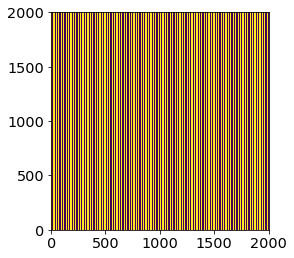

In [33]:
plt.imshow(hdulist1[0].data)

In [34]:
hdulist2 = fits.open('opd_ronchi200.fits')

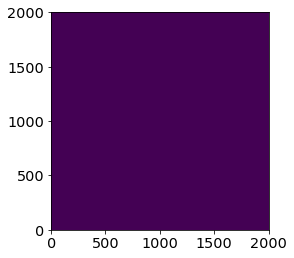

In [35]:
plt.imshow(hdulist2[0].data)